# 公司股价预测作业

# 作业要求：
设计一个预测股票价格的方法，并用实例证明此方法的有效性。  
所给的数据，要求全部都要使用，注意  
1. 数据需清洗  
2. 特征综合使用  

可自己额外补充资源或数据

# 基础得分点
1.	程序可运行
2.	缺失数据处理
3.	正则提取
4.	时间信息转换
5.	数据拼接
6.	数据标准化
7.	数据可视化
8.	模型构建与应用
9.	Markdown 排版
10.	分析逻辑

# 数据说明
1.	**全标题**   
    这是股票平台上发布的对各公司的分析文章
    1. 标题：文章的标题
    1. 字段1_链接_链接：原文章所在的URL
    1. ABOUT：文章针对的公司，都为缩写形式，多个公司以逗号隔开
    1. TIME：文章发布的时间
    1. AUTHOR：作者
    1. COMMENTS：采集时，文章的被评论次数
2.	**摘要**  
    这是股票平台上发布的对各公司的分析文章的摘要部分，**和“全标题”中的内容对应**  
    1. 标题：文章的标题  
    1. 字段2：文章发布的时间  
    1. 字段5：文章针对的公司及提及的公司；  
        1. About为针对公司，都提取缩写的大写模型，多个公司以逗号隔开  
        1. include为提及的其它公司，都提取缩写的大写模型，多个公司以逗号隔开  
    1. 字段1：摘要的全文字内容  
3.	**回帖**  
    这是网友在各文章下的回复内容   
    1. Title：各文章的标题；空标题的，用最靠近的有内容的下方标题  
    1. Content：回复的全文字内容  
4.	**论坛**  
    这是网友在各公司的论坛页面下，对之进行评论的发帖内容   
    1. 字段1：作者  
    1. 字段2：发帖日期  
    1. 字段3：帖子内容  
    1. 字段4_链接：具体的各公司的页面URL  
5.	**股票价格**
    为各公司工作日股票的价格  
    1. PERMNO：公司编号  
    1. Date：日期  
    1. TICKER：公司简写  
    1. COMNAM：公司全写  
    1. BIDLO：最低价  
    1. ASKHI：最高价  
    1. PRC：收盘价  
    1. VOL：成交量  
    1. OPENPRC：开盘价  

# 一、文件格式统一
显然，提供的文件中有`xlsx`格式的，也有`csv`格式的。  
而`csv`格式的操作行为明显速度和效率上明显优于`xlsx`格式，因此在这里我们将所有格式统一为`csv`格式。

In [1]:
import os
import pandas as pd
import numpy as np


# 转化函数，其实没有必要转化为函数，毕竟只用一次
def xlsx_to_csv_pd(path):
    for root, dirs, files in os.walk(path):
        for file in files:
            if(file.endswith('.xlsx')):
                # 获取文件路径
                data_xls = pd.read_excel(os.path.join(root, file), index_col=0)
                data_xls.to_csv(os.path.join(root, file).replace(
                    '.xlsx', '.csv'), encoding='utf-8')
                print(os.path.join(root, file), "转化成功")
                os.remove(os.path.join(root, file))


# 批量转化
xlsx_to_csv_pd(os.getcwd())

# 二、数据清洗

## 2.1 全标题摘要聚合
股票平台上发布的对各公司的分析文章的摘要部分，和“全标题”中的内容对应。  
所以读取全部内容，根据标题和时间以及公司聚合，同时去除原文链接这种对于我来说没用的内容。

### 2.1.1 读取全标题信息
这是股票平台上发布的对各公司的分析文章

1. 标题：文章的标题
1. 字段1_链接_链接：原文章所在的URL
1. ABOUT：文章针对的公司，都为缩写形式，多个公司以逗号隔开
1. TIME：文章发布的时间
1. AUTHOR：作者
1. COMMENTS：采集时，文章的被评论次数  

在这个Section,我们会读取整个csv文件，并且舍弃【字段1_链接_链接】

In [2]:
# 读取整个csv文件，并且舍弃【字段1_链接_链接】
Title_data = pd.read_csv("./全标题.csv", index_col=0, usecols=[0, 2, 3, 4, 5])

# 更改列标
Title_data.columns = ['针对公司', '发布时间', '作者', '评论数']

# 评论数去除Comments无用字段
Title_data["评论数"] = Title_data["评论数"].str.extract("([0-9]+)")

# 显示前五行内容
Title_data.head()

,针对公司,发布时间,作者,评论数
标题,,,,
Micron Technology: Insanely Cheap Stock Given Its High Earnings Quality,MU,"Dec. 31, 2018, 7:57 PM",Ruerd Heeg,75
Molson Coors Seems Attractive At These Valuations,TAP,"Dec. 31, 2018, 7:44 PM",Sanjit Deepalam,16
Gerdau: The Brazilian Play On U.S. Steel,GGB,"Dec. 31, 2018, 7:10 PM",Shannon Bruce,1
Will Apple Get Its Mojo Back?,AAPL,"Dec. 31, 2018, 5:36 PM",TipRanks,68
Lululemon Stock Looks Compelling On This Dip,LULU,"Dec. 31, 2018, 5:26 PM",L&F Capital Management,4


### 2.1.2 读取摘要信息

这是股票平台上发布的对各公司的分析文章的摘要部分，**和“全标题”中的内容对应**  
1. 标题：文章的标题  
1. 字段2：文章发布的时间  
1. 字段5：文章针对的公司及提及的公司；  
    1. About为针对公司，都提取缩写的大写模型，多个公司以逗号隔开  
    1. include为提及的其它公司，都提取缩写的大写模型，多个公司以逗号隔开  
1. 字段1：摘要的全文字内容  

In [3]:
# 读取整个csv文件，并且舍弃【字段1_链接_链接】
import re
Content_data = pd.read_csv("./摘要.csv", index_col=0)

# 更改列标
Content_data.columns = ['发布时间', '针对公司', '摘要']

# 处理【时间】
Content_data["发布时间"] = Content_data["发布时间"].map(lambda x: x.replace(" ET", ""))


# 处理【针对公司】
Content_data["针对公司"] = Content_data["针对公司"].map(
    lambda x: x.split("Includes:")[0].replace("| About: ", "").split(","))
# 提取【针对公司】中的简写
Content_data["针对公司"] = Content_data["针对公司"].map(
    lambda x: ["".join(re.findall('[(](.*?)[)]', i, re.S)) for i in x if not i.find("(") == -1])

# 显示前五行内容
Content_data.head()

,发布时间,针对公司,摘要
标题,,,
HealthEquity: Strong Growth May Be Slowing Heading Into 2021,"Apr. 1, 2019 10:46 PM",[HQY],SummaryHealthEquity’s revenue and earnings hav...
Valero May Rally Up To 40% Within The Next 12 Months,"Apr. 1, 2019 10:38 PM",[VLO],SummaryValero is ideally positioned to benefit...
Apple Makes A China Move,"Apr. 1, 2019 7:21 PM",[AAPL],SummaryCompany cuts prices on many key product...
Polaris Industries: Ready To Rally,"Apr. 1, 2019 7:14 PM",[PII],SummaryPolaris is a well-respected brand name ...
How Apple Will Return A Minimum Of 8% By The End Of FY19,"Apr. 1, 2019 5:03 PM",[AAPL],SummaryApple has exhibited strong segment grow...


### 2.1.3 合并两表

In [35]:
Title_Content_data = pd.merge(
    Title_data, Content_data, right_on='标题', left_index=True, how='outer')


def UpdateCompany(x):
    try:
        if(x["针对公司_x"]):
            return x["针对公司_x"]
        else:
            return x["针对公司_y"][0]
    except:
        return np.NAN


def UpdateTime(x):
    try:
        return np.unique([x["发布时间_x"].strip(), x["发布时间_y"].strip()])[0]
    except:
        return np.NAN


Title_Content_data['针对公司'] = Title_Content_data[['针对公司_x', '针对公司_y']].apply(
    lambda x:  UpdateCompany(x), axis=1)

Title_Content_data['发布时间'] = Title_Content_data[["发布时间_x", "发布时间_y"]].apply(
    lambda x:  UpdateTime(x), axis=1)

# pd.to_datetime(df)

# 删除无用列
Title_Content_data.drop(["发布时间_x", "发布时间_y"], axis=1, inplace=True)
Title_Content_data.drop(["针对公司_x", "针对公司_y"], axis=1, inplace=True)

# 删除无用行
Title_Content_data.dropna(axis=0, how='any', subset=[
                          "发布时间", "针对公司", "评论数"], inplace=True)

Title_Content_data.head()

,标题,作者,评论数,摘要,针对公司,发布时间
Micron Technology: Insanely Cheap Stock Given Its High Earnings Quality,Micron Technology: Insanely Cheap Stock Given ...,Ruerd Heeg,75,"SummaryLast year, a combination of relatively ...",MU,"Dec. 31, 2018 7:57 PM"
Molson Coors Seems Attractive At These Valuations,Molson Coors Seems Attractive At These Valuations,Sanjit Deepalam,16,SummaryMolson Coors's stock has fallen over 30...,TAP,"Dec. 31, 2018 7:44 PM"
Gerdau: The Brazilian Play On U.S. Steel,Gerdau: The Brazilian Play On U.S. Steel,Shannon Bruce,1,"SummaryGerdau is delivering good results, incl...",GGB,"Dec. 31, 2018 7:10 PM"
Will Apple Get Its Mojo Back?,Will Apple Get Its Mojo Back?,TipRanks,68,SummaryApple has been resting on a reputation ...,AAPL,"Dec. 31, 2018 5:36 PM"
Lululemon Stock Looks Compelling On This Dip,Lululemon Stock Looks Compelling On This Dip,L&F Capital Management,4,SummaryLululemon stock had a strong 2018 but f...,LULU,"Dec. 31, 2018 5:26 PM"


### 2.1.4 处理发布时间为标准日期格式

In [36]:
# 去除文本中空格
Title_Content_data["发布时间"] = Title_Content_data["发布时间"].str.replace(" ", "")
# 去除具体时间，只保留日期
Title_Content_data["发布时间"] = Title_Content_data["发布时间"].str.extract(
    "([a-zA-Z]+\.[0-9]+,[0-9]{4})")
# 序列转化
Title_Content_data["发布时间"] = pd.to_datetime(Title_Content_data["发布时间"])

Title_Content_data.head()

,标题,作者,评论数,摘要,针对公司,发布时间
Micron Technology: Insanely Cheap Stock Given Its High Earnings Quality,Micron Technology: Insanely Cheap Stock Given ...,Ruerd Heeg,75,"SummaryLast year, a combination of relatively ...",MU,2018-12-31
Molson Coors Seems Attractive At These Valuations,Molson Coors Seems Attractive At These Valuations,Sanjit Deepalam,16,SummaryMolson Coors's stock has fallen over 30...,TAP,2018-12-31
Gerdau: The Brazilian Play On U.S. Steel,Gerdau: The Brazilian Play On U.S. Steel,Shannon Bruce,1,"SummaryGerdau is delivering good results, incl...",GGB,2018-12-31
Will Apple Get Its Mojo Back?,Will Apple Get Its Mojo Back?,TipRanks,68,SummaryApple has been resting on a reputation ...,AAPL,2018-12-31
Lululemon Stock Looks Compelling On This Dip,Lululemon Stock Looks Compelling On This Dip,L&F Capital Management,4,SummaryLululemon stock had a strong 2018 but f...,LULU,2018-12-31


## 2.2 回帖聚合
这是网友在各文章下的回复内容   
1. Title：各文章的标题；空标题的，用最靠近的有内容的下方标题  
1. Content：回复的全文字内容 

回帖都处于一个文件夹下，这时我们遍历文件夹。  
然后统一操作，合并各个Dataframe就完事了。

In [27]:
# 创建一个空的 DataFrame
Reply_data = pd.DataFrame(columns=['字段', '标题1'])

for root, dirs, files in os.walk(os.path.join(os.getcwd(), "回帖")):
    for file in files:
        if(file.endswith('.csv')):
            # 获取文件路径
            Reply_data_part = pd.read_csv(os.path.join(root, file))
            # 删除无用行
            Reply_data_part.dropna(axis=0, how='any', inplace=True)
            # display(Reply_data_part.head())
            Reply_data = pd.concat(
                [Reply_data, Reply_data_part], axis=0, ignore_index=True)

# 更改列标
Reply_data.columns = ['回复内容', '标题']

Reply_data.head()

,回复内容,标题
0,Bought GLW after the dot.com bust in early 200...,Corning: A Unique Company Playing In Multiple ...
1,"Bill, a very fair assessment on BB going forwa...",BlackBerry Takes A Step Forward
2,Nice article. I'm sticking with SBLKZ. Nice yield,"Star Bulk Poised To Rip Higher, Buyback Coming?"
3,Craig - Hallum was ranked on TipRanks as #1 in...,DiaMedica Therapeutics Aims For $18 Million IPO
4,Why your strong emphasis on free CF? Most d...,"Gulfport Energy: Higher Risk, Higher Reward"


## 2.3 论坛聚合
这是网友在各公司的论坛页面下，对之进行评论的发帖内容   
1. 字段1：作者  
1. 字段2：发帖日期  
1. 字段3：帖子内容  
1. 字段4_链接：具体的各公司的页面URL  

In [30]:
# 创建一个空的 DataFrame
Forum_data = pd.read_csv("论坛.csv")

# 更改列标
Forum_data.columns = ['作者', '发帖日期', '帖子内容', '公司']

Forum_data.head()

,作者,发帖日期,帖子内容,公司
0,ComputerBlue,31-Dec-18,Let's create a small spec POS portfolio $COTY ...,https://seekingalpha.com/symbol/COTY
1,Darren McCammon,31-Dec-18,"$RICK ""Now that we've reported results, we'll ...",https://seekingalpha.com/symbol/RICK
2,Jonathan Cooper,31-Dec-18,Do any $APHA shareholders support the $GGB tak...,https://seekingalpha.com/symbol/APHA
3,lstasel,31-Dec-18,Long on $T . Even if it means smaller dividend...,https://seekingalpha.com/symbol/T
4,Nicholas Ward,31-Dec-18,"2018 was a down year for me, but I'm happy to ...",https://seekingalpha.com/symbol/SPY


### 2.3.1 公司序列处理
可以看到公司那一栏其实是URL，前面的 https://seekingalpha.com/symbol/ 可以直接去掉

In [37]:
Forum_data["公司"]=Forum_data["公司"].str.replace(r"https://seekingalpha.com/symbol/","")
Forum_data.head()

,作者,发帖日期,帖子内容,公司
0,ComputerBlue,31-Dec-18,Let's create a small spec POS portfolio $COTY ...,COTY
1,Darren McCammon,31-Dec-18,"$RICK ""Now that we've reported results, we'll ...",RICK
2,Jonathan Cooper,31-Dec-18,Do any $APHA shareholders support the $GGB tak...,APHA
3,lstasel,31-Dec-18,Long on $T . Even if it means smaller dividend...,T
4,Nicholas Ward,31-Dec-18,"2018 was a down year for me, but I'm happy to ...",SPY


然后时间那里一样需要格式化成一样的

In [39]:
Forum_data["发帖日期"] = pd.to_datetime(Forum_data["发帖日期"])
Forum_data.head()

,作者,发帖日期,帖子内容,公司
0,ComputerBlue,2018-12-31,Let's create a small spec POS portfolio $COTY ...,COTY
1,Darren McCammon,2018-12-31,"$RICK ""Now that we've reported results, we'll ...",RICK
2,Jonathan Cooper,2018-12-31,Do any $APHA shareholders support the $GGB tak...,APHA
3,lstasel,2018-12-31,Long on $T . Even if it means smaller dividend...,T
4,Nicholas Ward,2018-12-31,"2018 was a down year for me, but I'm happy to ...",SPY


## 2.4 股价处理
为各公司工作日股票的价格  
1. PERMNO：公司编号  
1. Date：日期  
1. TICKER：公司简写  
1. COMNAM：公司全写  
1. BIDLO：最低价  
1. ASKHI：最高价  
1. PRC：收盘价  
1. VOL：成交量  
1. OPENPRC：开盘价 

In [48]:
# 创建一个空的 DataFrame
Stock_data = pd.read_csv("股票价格.csv",usecols=[0,1,2,4,5,6,7,8])

# 更改列标
Stock_data.columns = ['公司编号', '日期', '公司简写', '最低价', '最高价', '收盘价', '成交量', '开盘价']

Stock_data.head()

,公司编号,日期,公司简写,最低价,最高价,收盘价,成交量,开盘价
0,10026,20180702,JJSF,150.70000,153.27499,152.92000,100388.0,152.17999
1,10026,20180703,JJSF,151.35001,153.73000,153.32001,55547.0,153.67000
2,10026,20180705,JJSF,152.46001,156.00000,155.81000,199370.0,153.95000
3,10026,20180706,JJSF,154.80000,158.44000,158.42999,127431.0,156.00000
4,10026,20180709,JJSF,154.44000,159.05000,154.53000,97661.0,158.60001


时间序列处理一下

In [49]:
Stock_data["日期"] = pd.to_datetime(Stock_data["日期"], format="%Y%m%d")
Stock_data.head()

,公司编号,日期,公司简写,最低价,最高价,收盘价,成交量,开盘价
0,10026,2018-07-02,JJSF,150.70000,153.27499,152.92000,100388.0,152.17999
1,10026,2018-07-03,JJSF,151.35001,153.73000,153.32001,55547.0,153.67000
2,10026,2018-07-05,JJSF,152.46001,156.00000,155.81000,199370.0,153.95000
3,10026,2018-07-06,JJSF,154.80000,158.44000,158.42999,127431.0,156.00000
4,10026,2018-07-09,JJSF,154.44000,159.05000,154.53000,97661.0,158.60001


# 3.图表绘制

## 3.1 各公司股票分类
按照各个公司将股票分开，这里利用groupby函数。  
这里只展示分类后第一个股票的图表。

In [57]:
import matplotlib.pyplot as plt

StockData = Stock_data.groupby(['公司编号'])

display(StockData.groups)

{10026: Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
             ...
             116, 117, 118, 119, 120, 121, 122, 123, 124, 125],
            dtype='int64', length=126),
 10028: Int64Index([126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
             ...
             242, 243, 244, 245, 246, 247, 248, 249, 250, 251],
            dtype='int64', length=126),
 10032: Int64Index([252, 253, 254, 255, 256, 257, 258, 259, 260, 261,
             ...
             368, 369, 370, 371, 372, 373, 374, 375, 376, 377],
            dtype='int64', length=126),
 10044: Int64Index([378, 379, 380, 381, 382, 383, 384, 385, 386, 387,
             ...
             494, 495, 496, 497, 498, 499, 500, 501, 502, 503],
            dtype='int64', length=126),
 10051: Int64Index([504, 505, 506, 507, 508, 509, 510, 511, 512, 513,
             ...
             620, 621, 622, 623, 624, 625, 626, 627, 628, 629],
            dtype='int64', length=126),
 10065: Int64Index([630, 631, 632, 633, 634, 

现在我们获取第一个公司

In [69]:
# 所有公司编号
Company_num = list(dict(StockData.groups).keys())

the_first_company = Company_num[0]

Company1 = Stock_data[Stock_data["公司编号"] == the_first_company]

Company1

,公司编号,日期,公司简写,最低价,最高价,收盘价,成交量,开盘价
0,10026,2018-07-02,JJSF,150.70000,153.27499,152.92000,100388.0,152.17999
1,10026,2018-07-03,JJSF,151.35001,153.73000,153.32001,55547.0,153.67000
2,10026,2018-07-05,JJSF,152.46001,156.00000,155.81000,199370.0,153.95000
3,10026,2018-07-06,JJSF,154.80000,158.44000,158.42999,127431.0,156.00000
4,10026,2018-07-09,JJSF,154.44000,159.05000,154.53000,97661.0,158.60001
...,...,...,...,...,...,...,...,...
121,10026,2018-12-24,JJSF,140.67999,143.72000,140.67999,44845.0,141.81000
122,10026,2018-12-26,JJSF,138.64999,144.17999,143.42000,51748.0,140.95000
123,10026,2018-12-27,JJSF,140.00999,144.63000,144.63000,72017.0,142.63000
124,10026,2018-12-28,JJSF,141.10001,147.66499,142.92999,62322.0,145.10001


### 3.1.1 成交量绘图

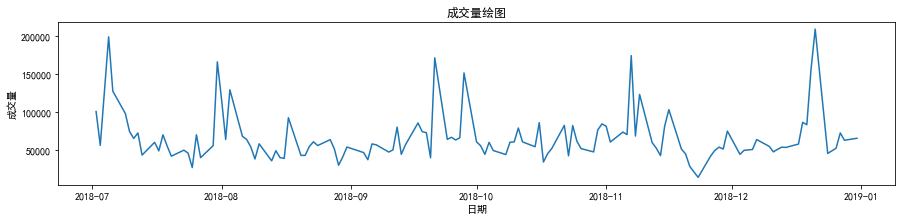

In [82]:
plt.rcParams["font.sans-serif"]=["SimHei"] #用来正常显示中文标签
plt.rcParams["axes.unicode_minus"]=False #用来正常显示负号

plt.figure(figsize=(15, 3))

plt.plot(Company1["日期"],Company1["成交量"])
plt.title("成交量绘图") #图名
plt.xlabel("日期")#x轴标签
plt.ylabel("成交量")#y轴标签
plt.tick_params(axis='both')#x,y轴都有刻度
plt.show()

### 3.1.2 收盘价绘图

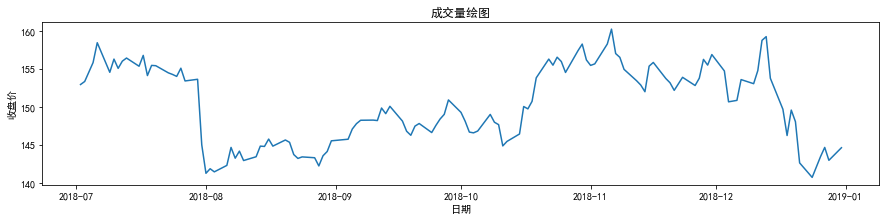

In [83]:
plt.rcParams["font.sans-serif"]=["SimHei"] #用来正常显示中文标签
plt.rcParams["axes.unicode_minus"]=False #用来正常显示负号

plt.figure(figsize=(15, 3))

plt.plot(Company1["日期"],Company1["收盘价"])
plt.title("成交量绘图") #图名
plt.xlabel("日期")#x轴标签
plt.ylabel("收盘价")#y轴标签
plt.tick_params(axis='both')#x,y轴都有刻度
plt.show()